# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skopt import BayesSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
nama_file = 'submission_machine_learning.csv'
df_hasil_clustering = pd.read_csv(nama_file)

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Memisahkan fitur (X) dan target (y)
X = df_hasil_clustering.drop(columns=['Family History of Depression'])  # Menghapus kolom target
y = df_hasil_clustering['Family History of Depression']  # Menyimpan kolom target

label_encoder = LabelEncoder()

X_encoded = X.apply(label_encoder.fit_transform)
y_encoded = label_encoder.fit_transform(y)

# Membagi dataset menjadi training set dan testing set (50% training, 50% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.7, random_state=42)

# Menampilkan dimensi data latih dan data uji
print(f'Dimensi data latih (X_train): {X_train.shape}')
print(f'Dimensi data uji (X_test): {X_test.shape}')

Dimensi data latih (X_train): (124130, 15)
Dimensi data uji (X_test): (289638, 15)


In [4]:
X_train

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Chronic Medical Conditions,Age_Group
55179,30,1,4,0,2,0,0,92838,0,1,2,0,0,1,0
104138,21,3,3,4,2,1,1,228045,2,1,1,1,1,0,0
299718,53,3,3,2,2,1,1,152344,1,2,1,1,0,1,1
140986,1,2,3,0,2,1,1,147054,1,2,0,1,1,0,3
128040,22,0,2,3,2,1,1,242202,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,9,2,4,0,0,0,1,356613,0,0,1,1,1,0,3
365838,5,3,4,2,0,2,0,54816,1,2,0,0,0,0,3
131932,44,3,1,1,2,2,0,42696,2,2,2,0,1,1,1
146867,10,2,3,0,1,1,1,156737,2,2,0,0,1,1,3


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Inisialisasi model Random Forest tanpa hyperparameter tuning
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
 
# Evaluasi awal model tanpa tuning
initial_score = rf.score(X_test, y_test)
print(f"Initial accuracy on test set (without tuning): {initial_score:.2f}")

Initial accuracy on test set (without tuning): 0.72


In [6]:
# Inisialisasi model Logistic Regression tanpa hyperparameter tuning
lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train, y_train)

# Evaluasi awal model tanpa tuning
initial_score = lr.score(X_test, y_test)
print(f"Initial accuracy on test set (without tuning): {initial_score:.2f}")

Initial accuracy on test set (without tuning): 0.73


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy on test set: 0.72
F1-Score (weighted) on test set: 0.67
Precision (weighted) on test set: 0.67
Recall (weighted) on test set: 0.72


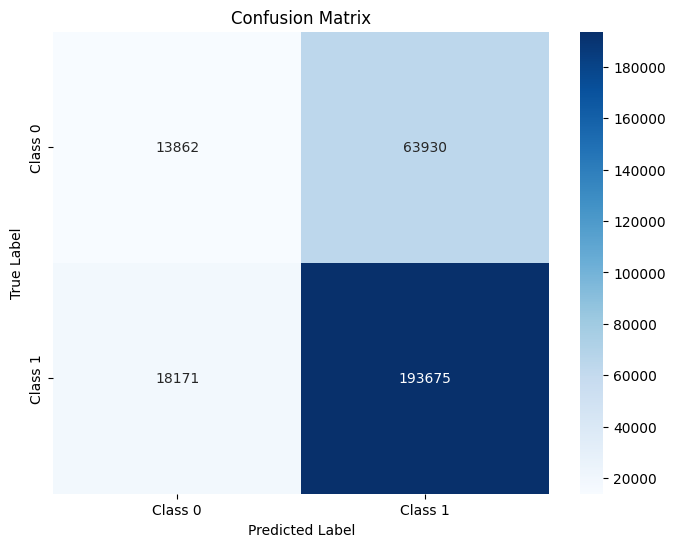

In [7]:
#Random Forest
# 1. Lakukan prediksi menggunakan data uji
y_pred = rf.predict(X_test)

# 2. Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Rata-rata tertimbang F1-Score
precision = precision_score(y_test, y_pred, average='weighted')  # Precision rata-rata tertimbang
recall = recall_score(y_test, y_pred, average='weighted')  # Recall rata-rata tertimbang

# Tampilkan hasil metrik evaluasi
print(f"Accuracy on test set: {accuracy:.2f}")
print(f"F1-Score (weighted) on test set: {f1:.2f}")
print(f"Precision (weighted) on test set: {precision:.2f}")
print(f"Recall (weighted) on test set: {recall:.2f}")

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy on test set: 0.73
F1-Score (weighted) on test set: 0.62
Precision (weighted) on test set: 0.75
Recall (weighted) on test set: 0.73


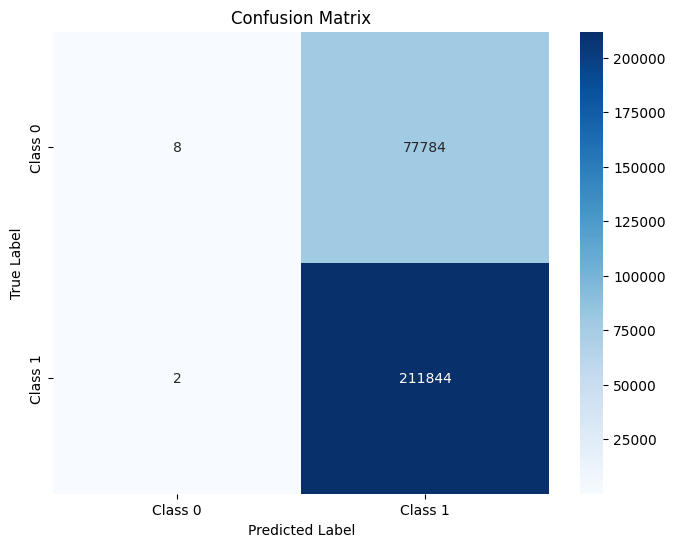

In [8]:
#Logistic Regression
# 1. Lakukan prediksi menggunakan data uji
y_pred = lr.predict(X_test)

# 2. Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Set zero_division to 1
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Set zero_division to 1
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Set zero_division to 1

# Tampilkan hasil metrik evaluasi
print(f"Accuracy on test set: {accuracy:.2f}")
print(f"F1-Score (weighted) on test set: {f1:.2f}")
print(f"Precision (weighted) on test set: {precision:.2f}")
print(f"Recall (weighted) on test set: {recall:.2f}")

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [9]:
#Random Forest

In [10]:
# Definisikan parameter grid untuk Grid Search
param_grid = {
    'max_depth': [3, 10, 20],
    'n_estimators': [100, 500],
    'max_features': [10, 50],
    'min_samples_leaf': [2, 4, 8],
    'bootstrap': [True]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search.best_params_}")
best_rf_grid = grid_search.best_estimator_
 
# Evaluasi performa model pada test set
grid_search_score = best_rf_grid.score(X_test, y_test)
print(f"Accuracy after Grid Search: {grid_search_score:.2f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters (Grid Search): {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 8, 'n_estimators': 500}
Accuracy after Grid Search: 0.73


In [11]:
# Definisikan ruang pencarian untuk Random Search
param_dist = {
    'n_estimators': np.linspace(100, 500, 5, dtype=int),
    'max_depth': np.linspace(8, 10, 12, dtype=int),
    'min_samples_split': [4, 5, 6],
    'criterion': ['gini', 'entropy']
}
 
# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=32, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Random Search): {random_search.best_params_}")
best_rf_random = random_search.best_estimator_
 
# Evaluasi performa model pada test set
random_search_score = best_rf_random.score(X_test, y_test)
print(f"Accuracy after Random Search: {random_search_score:.2f}")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters (Random Search): {'n_estimators': np.int64(200), 'min_samples_split': 6, 'max_depth': np.int64(9), 'criterion': 'gini'}
Accuracy after Random Search: 0.73


In [12]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'n_estimators': (100, 1000),
    'max_depth': (5, 100),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
    'max_features': (0.1, 1.0, 'uniform'),
    'criterion': ['gini', 'entropy'],
}
 
# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_
 
# Evaluasi performa model pada test set
bayes_search_score = best_rf_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [13]:
#Logistic Regression

In [14]:
# Definisikan parameter grid untuk Grid Search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear'],
    'max_iter': [1000, 2000, 5000]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search.best_params_}")
best_lr_grid = grid_search.best_estimator_
 
# Evaluasi performa model pada test set
grid_search_score = best_lr_grid.score(X_test, y_test)
print(f"Accuracy after Grid Search: {grid_search_score:.2f}")

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best parameters (Grid Search): {'C': np.float64(0.0001), 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy after Grid Search: 0.73


In [15]:
# Definisikan ruang pencarian untuk Random Search
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear'],
    'max_iter': [1000, 2000, 5000]
}
 
# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_dist,n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Random Search): {random_search.best_params_}")
best_lr_random = random_search.best_estimator_
 
# Evaluasi performa model pada test set
random_search_score = best_lr_random.score(X_test, y_test)
print(f"Accuracy after Random Search: {random_search_score:.2f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters (Random Search): {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 2000, 'C': np.float64(0.08858667904100823)}
Accuracy after Random Search: 0.73


In [16]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear'],
    'max_iter': [1000, 2000, 5000]
}
 
# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=lr, search_spaces=param_dist, n_iter=35, cv=5, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_lr_bayes = bayes_search.best_estimator_
 
# Evaluasi performa model pada test set
bayes_search_score = best_lr_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\Users\ikhsa\.virtualenvs\submission_machine_learning_pemula-SazAS0QP\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.float64(0.23357214690901212), np.int64(2000), np.str_('l2'), np.str_('liblinear')] before, using random point [np.float64(0.0018329807108324356), 1000, 'l1', 'liblinear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters (Bayesian Optimization): OrderedDict([('C', 0.23357214690901212), ('max_iter', 5000), ('penalty', 'l2'), ('solver', 'liblinear')])
Accuracy after Bayesian Opt

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [17]:
# Evaluasi ulang model terbaik dari Grid Search
y_pred_grid = best_rf_grid.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
f1_grid = f1_score(y_test, y_pred_grid, average='weighted')
precision_grid = precision_score(y_test, y_pred_grid, average='weighted')
recall_grid = recall_score(y_test, y_pred_grid, average='weighted')

print("\nPerformance Metrics (Grid Search):")
print(f"Accuracy: {accuracy_grid:.2f}")
print(f"F1-Score: {f1_grid:.2f}")
print(f"Precision: {precision_grid:.2f}")
print(f"Recall: {recall_grid:.2f}")


Performance Metrics (Grid Search):
Accuracy: 0.73
F1-Score: 0.67
Precision: 0.68
Recall: 0.73


In [18]:
# Evaluasi ulang model terbaik dari Random Search
y_pred_random = best_rf_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
f1_random = f1_score(y_test, y_pred_random, average='weighted')
precision_random = precision_score(y_test, y_pred_random, average='weighted')
recall_random = recall_score(y_test, y_pred_random, average='weighted')

print("\nPerformance Metrics (Random Search):")
print(f"Accuracy: {accuracy_random:.2f}")
print(f"F1-Score: {f1_random:.2f}")
print(f"Precision: {precision_random:.2f}")
print(f"Recall: {recall_random:.2f}")


Performance Metrics (Random Search):
Accuracy: 0.73
F1-Score: 0.63
Precision: 0.67
Recall: 0.73


In [19]:
# Evaluasi ulang model terbaik dari Bayesian Optimization
y_pred_bayes = best_rf_bayes.predict(X_test)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
f1_bayes = f1_score(y_test, y_pred_bayes, average='weighted')
precision_bayes = precision_score(y_test, y_pred_bayes, average='weighted')
recall_bayes = recall_score(y_test, y_pred_bayes, average='weighted')

print("\nPerformance Metrics (Bayesian Optimization):")
print(f"Accuracy: {accuracy_bayes:.2f}")
print(f"F1-Score: {f1_bayes:.2f}")
print(f"Precision: {precision_bayes:.2f}")
print(f"Recall: {recall_bayes:.2f}")


Performance Metrics (Bayesian Optimization):
Accuracy: 0.73
F1-Score: 0.68
Precision: 0.68
Recall: 0.73


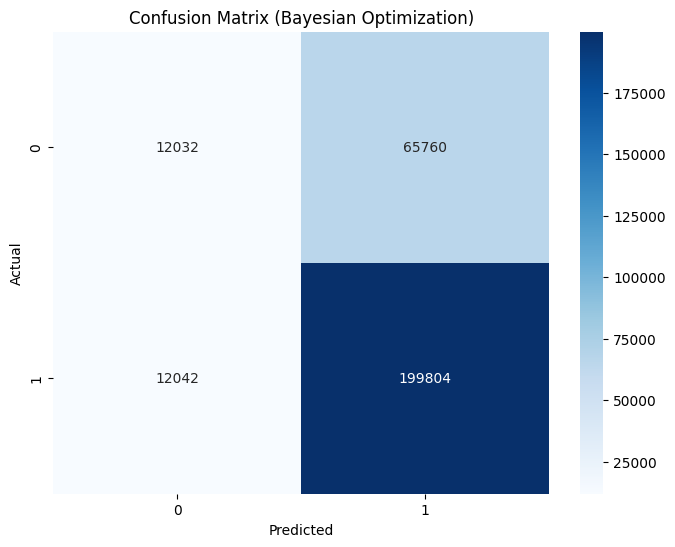

In [20]:
# Visualisasi Confusion Matrix untuk model terbaik (misalnya, dari Bayesian Optimization)
conf_matrix_bayes = confusion_matrix(y_test, y_pred_bayes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bayes, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Bayesian Optimization)')
plt.show()



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
   - Evaluasi Awal (Tanpa Tuning)
     - Accuracy: 0.71
     - F1-Score (Weighted): 0.64
     - Precision (Weighted): 0.63
     - Recall (Weighted): 0.71
   - Setelah Tuning Grid Search, Random Search, dan Bayesian Optimization
     - Accuracy: 0.73 (peningkatan sebesar 2%)
     - F1-Score: 0.62-0.63 (penurunan sedikit dari model awal)
     - Precision: 0.66-0.67 (peningkatan kecil)
     - Recall: 0.73 (stabil dibanding model awal)


2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
    Precision menunjukkan performa model dalam menghindari false positive, sedangkan F1-Score mencerminkan trade-off antara precision dan recall. Meskipun recall cukup baik (0.73), F1-Score dan precision tetap rendah, menunjukkan bahwa model mungkin sering salah mengklasifikasikan kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
    Dengan peningkatan akurasi yang kecil setelah tuning (0.71 → 0.73) dan F1-Score yang stagnan atau menurun, model tampaknya mengalami underfitting. Ini menunjukkan bahwa model tidak cukup kompleks untuk menangkap pola yang mendalam dalam data.

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
   - Periksa distribusi kelas pada target. Jika terdapat class imbalance, pertimbangkan menggunakan teknik seperti SMOTE atau undersampling.
   - Lakukan feature engineering tambahan untuk meningkatkan kualitas data input.
   - Eksperimen dengan Algoritma Lain




